<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Inf_T3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
#Leer datos--------------------------------
DATA=pd.read_csv("data.txt", delim_whitespace=True)
print(DATA)
#------------------------------------

     Obs  eruptions  waiting
0      1      3.600       79
1      2      1.800       54
2      3      3.333       74
3      4      2.283       62
4      5      4.533       85
..   ...        ...      ...
267  268      4.117       81
268  269      2.150       46
269  270      4.417       90
270  271      1.817       46
271  272      4.467       74

[272 rows x 3 columns]


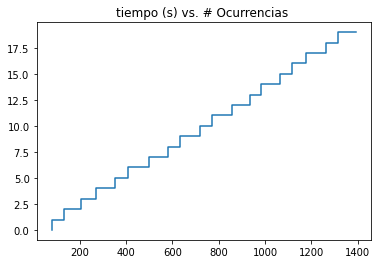

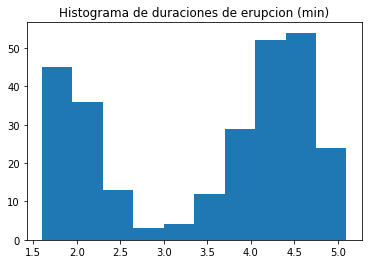

In [66]:
#Exploracion------------------------------------
Tiempos_acum=np.cumsum(DATA["waiting"])#En minutos.
Duraciones=DATA["eruptions"]#En segundos.
plt.step(Tiempos_acum[:20],np.arange(0,len(Tiempos_acum[:20])),)
plt.title("tiempo (s) vs. # Ocurrencias ")
plt.show()
plt.hist(Duraciones)
plt.title("Histograma de duraciones de erupcion (min)")
plt.show()
#------------------------------------
